In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [122]:
df_join = pd.read_excel('../data/data_joined_16-23.xlsx')

In [137]:
df_join['year_built'] = df_join.year_built.apply(lambda x: int(x[:x.find(' ')]) if type(x)==str else x)

In [123]:
df_infl = pd.read_excel('../data/constructed/inflation-rate-in-kazakhstan-2028.xlsx', sheet_name='Data')
df_infl['Year'] = pd.to_numeric(df_infl['Year'].str.replace('*',''))
df_infl=df_infl[pd.to_numeric(df_infl.Year)>=2016]
def get_perc_from_base(row):
    if row['Year'] == 2016:
        return 1.0
    else:
        return (1+row['Value']/100)

df_infl['Multiplier'] = df_infl.apply(lambda x: get_perc_from_base(x),axis=1)

for elem in range(18, 18 + df_infl.__len__()):
    if elem != 18:
        df_infl.at[elem,'Multiplier'] = df_infl.at[elem,'Multiplier']*df_infl.at[elem-1,'Multiplier']
    
df_join = df_join.merge(df_infl[['Year','Multiplier']], left_on='YEAR',right_on='Year').drop(columns=['Year'])

C:\Users\User\AppData\Local\Temp\ipykernel_5100\1967267119.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_infl['Year'] = pd.to_numeric(df_infl['Year'].str.replace('*',''))


In [124]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, KFold

from 2020 to 2021 trial

In [11]:
df_join.columns

Index(['Unnamed: 0', 'area', 'price', 'floor', 'year_built', 'region',
       'total_floor', 'Latitude', 'Longitude', 'YEAR', 'Regions', 'Multiplier',
       'price_adj', 'price_adj_per_area'],
      dtype='object')

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [125]:
onehot = OneHotEncoder(sparse_output=False).fit(df_join[['Regions']])

df_join = df_join.join(pd.DataFrame(onehot.transform(df_join[['Regions']]), columns=onehot.get_feature_names_out()))

In [126]:
df_join['price_adj'] = df_join['price']/df_join['Multiplier']

In [127]:
df_join['price_adj_per_area'] = df_join['price_adj']/df_join['area']

In [128]:
df_join['price_per_area'] = df_join['price']/df_join['area']

In [33]:
df_join.columns

Index(['Unnamed: 0', 'area', 'price', 'floor', 'year_built', 'region',
       'total_floor', 'Latitude', 'Longitude', 'YEAR', 'Regions', 'Multiplier',
       'price_adj', 'price_adj_per_area', 'Regions_Alatau', 'Regions_Almaly',
       'Regions_Almaty', 'Regions_Auezov', 'Regions_Bostandyq',
       'Regions_Jetysu', 'Regions_Medeu', 'Regions_Nauryzbai',
       'Regions_Turksib'],
      dtype='object')

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df_join[df_join['YEAR'] == 2020][['floor', 'year_built',
       'total_floor', 'Latitude', 'Longitude', 'Regions_Alatau', 'Regions_Almaly',
       'Regions_Almaty', 'Regions_Auezov', 'Regions_Bostandyq',
       'Regions_Jetysu', 'Regions_Medeu', 'Regions_Nauryzbai',
       'Regions_Turksib']], df_join[df_join['YEAR'] == 2020]['price_per_area'])

In [42]:
tree = DecisionTreeRegressor(min_samples_leaf = 5).fit(X_train, y_train)

In [69]:
tree = GridSearchCV(DecisionTreeRegressor(), {'min_samples_leaf': range(1,20)}).fit(X_train, y_train)

In [70]:
tree.score(X_test, y_test)

0.6627451110283277

In [71]:
tree.score(df_join[df_join['YEAR'] == 2021][['floor', 'year_built',
       'total_floor', 'Latitude', 'Longitude', 'Regions_Alatau', 'Regions_Almaly',
       'Regions_Almaty', 'Regions_Auezov', 'Regions_Bostandyq',
       'Regions_Jetysu', 'Regions_Medeu', 'Regions_Nauryzbai',
       'Regions_Turksib']], df_join[df_join['YEAR'] == 2021]['price_per_area']/(1.08))

-0.5650137796735626

In [46]:
df_infl.loc[df_infl.Year==2021,'Value']

23    8.0
Name: Value, dtype: float64

Try reverse 2021 to 2020

In [151]:
X_train, X_test, y_train, y_test = train_test_split(df_join[df_join['YEAR'] == 2021][['floor', 'year_built',
       'total_floor', 'Latitude', 'Longitude', 'Regions_Alatau', 'Regions_Almaly',
       'Regions_Almaty', 'Regions_Auezov', 'Regions_Bostandyq',
       'Regions_Jetysu', 'Regions_Medeu', 'Regions_Nauryzbai',
       'Regions_Turksib']], df_join[df_join['YEAR'] == 2021]['price_per_area'], test_size=0.2)

In [152]:
tree = DecisionTreeRegressor(min_samples_leaf = 5).fit(X_train, y_train)

In [153]:
tree = GridSearchCV(DecisionTreeRegressor(), {'min_samples_leaf': range(1,20)}).fit(X_train, y_train)

In [154]:
tree.score(X_test, y_test)

0.48567106003332083

In [155]:
tree.score(df_join[df_join['YEAR'] == 2020][['floor', 'year_built',
       'total_floor', 'Latitude', 'Longitude', 'Regions_Alatau', 'Regions_Almaly',
       'Regions_Almaty', 'Regions_Auezov', 'Regions_Bostandyq',
       'Regions_Jetysu', 'Regions_Medeu', 'Regions_Nauryzbai',
       'Regions_Turksib']], df_join[df_join['YEAR'] == 2020]['price_per_area']*(1.08))

-1.0745224605759676

Very bad

In [56]:
df_join['YEAR'].value_counts()

2020    59856
2017    22916
2021    19298
2023    17551
2019     1211
2022      153
2016       91
2018       23
Name: YEAR, dtype: int64

2019 to 2020

In [143]:
X_train, X_test, y_train, y_test = train_test_split(df_join[df_join['YEAR'] == 2019][['floor', 'year_built',
       'total_floor', 'Latitude', 'Longitude', 'Regions_Alatau', 'Regions_Almaly',
       'Regions_Almaty', 'Regions_Auezov', 'Regions_Bostandyq',
       'Regions_Jetysu', 'Regions_Medeu', 'Regions_Nauryzbai',
       'Regions_Turksib']], df_join[df_join['YEAR'] == 2019]['price_per_area'])

In [144]:
tree = DecisionTreeRegressor(min_samples_leaf = 5).fit(X_train, y_train)

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
tree = GridSearchCV(DecisionTreeRegressor(), {'min_samples_leaf': range(1,20)}).fit(X_train, y_train)

In [147]:
tree.score(X_test, y_test)

0.4403585246123777

In [148]:
tree.score(df_join[df_join['YEAR'] == 2020][['floor', 'year_built',
       'total_floor', 'Latitude', 'Longitude', 'Regions_Alatau', 'Regions_Almaly',
       'Regions_Almaty', 'Regions_Auezov', 'Regions_Bostandyq',
       'Regions_Jetysu', 'Regions_Medeu', 'Regions_Nauryzbai',
       'Regions_Turksib']], df_join[df_join['YEAR'] == 2020]['price_per_area']*(1.08))

0.13035081804733317

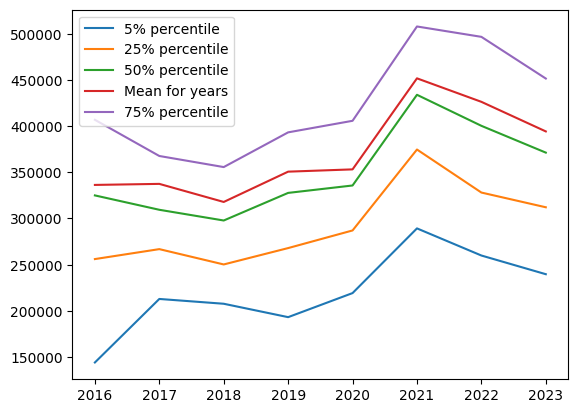

In [129]:
plt.plot(df_join.groupby('YEAR').price_adj_per_area.quantile(0.05), label='5% percentile')
plt.plot(df_join.groupby('YEAR').price_adj_per_area.quantile(0.25), label='25% percentile')
plt.plot(df_join.groupby('YEAR').price_adj_per_area.quantile(0.5), label='50% percentile')
plt.plot(df_join.groupby('YEAR').price_adj_per_area.mean(), label='Mean for years')
plt.plot(df_join.groupby('YEAR').price_adj_per_area.quantile(0.75), label='75% percentile')
plt.legend()

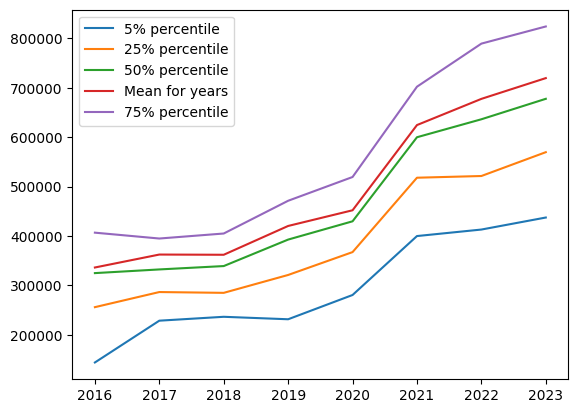

In [150]:
plt.plot(df_join.groupby('YEAR').price_per_area.quantile(0.05), label='5% percentile')
plt.plot(df_join.groupby('YEAR').price_per_area.quantile(0.25), label='25% percentile')
plt.plot(df_join.groupby('YEAR').price_per_area.quantile(0.5), label='50% percentile')
plt.plot(df_join.groupby('YEAR').price_per_area.mean(), label='Mean for years')
plt.plot(df_join.groupby('YEAR').price_per_area.quantile(0.75), label='75% percentile')
plt.legend()

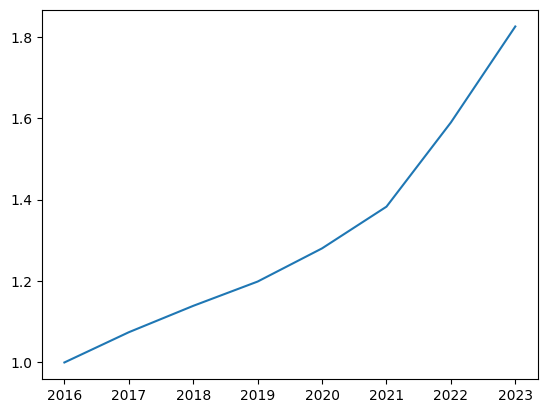

In [110]:
plt.plot(df_join.groupby('YEAR').Multiplier.mean())

<AxesSubplot: xlabel='Year', ylabel='Value'>

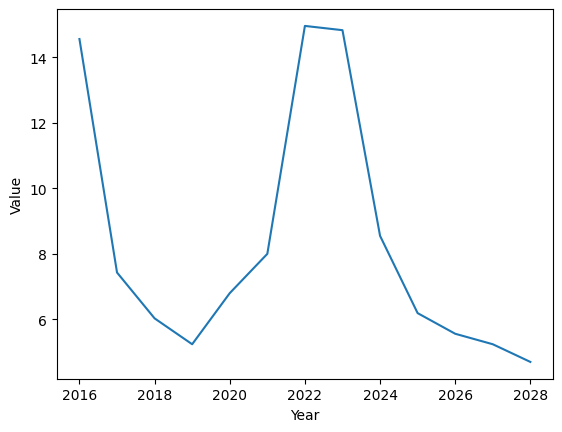

In [115]:
sns.lineplot(df_infl,x='Year',y='Value')

In [118]:
df_join[df_join['YEAR'] == 2023].price.sort_values()

13003         25500
14018       3500000
13138       4100000
6933        4180000
5882        5300000
            ...    
1750     1130000000
8320     1400000000
12196    1400000000
10740    1500000000
11783    1900000000
Name: price, Length: 17551, dtype: int64

<AxesSubplot: xlabel='Multiplier', ylabel='price'>

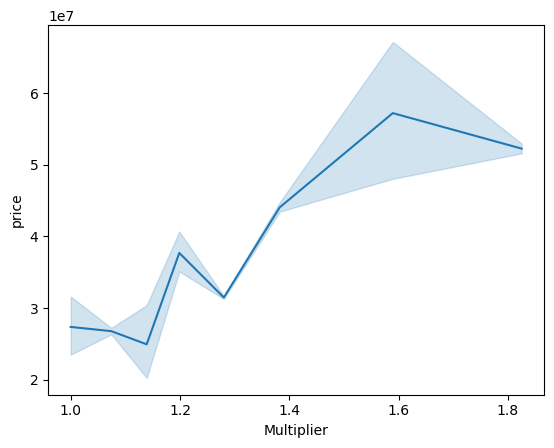

In [149]:
sns.lineplot(df_join, x='Multiplier', y='price')

In [120]:
df_join['']

,Year,Value,Unit,Multiplier
18,2016,14.56,in %,1.000000
19,2017,7.43,in %,1.074300
20,2018,6.03,in %,1.139080
21,2019,5.24,in %,1.198768
22,2020,6.80,in %,1.280284
23,2021,8.00,in %,1.382707
24,2022,14.96,in %,1.589560
25,2023,14.83,in %,1.825292
26,2024,8.55,in %,1.981354
27,2025,6.19,in %,2.104000
